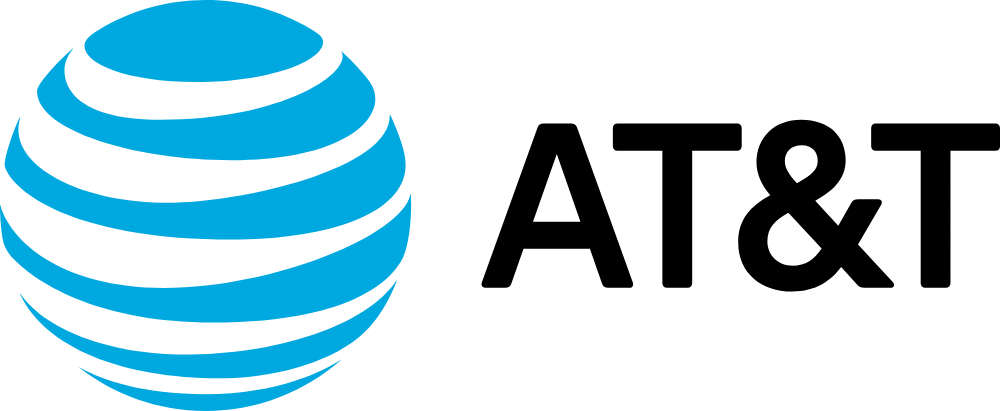
AT&T LOGO
Company's Description 📇
AT&T Inc. is an American multinational telecommunications holding company headquartered at Whitacre Tower in Downtown Dallas, Texas. It is the world's largest telecommunications company by revenue and the third largest provider of mobile telephone services in the U.S. As of 2022, AT&T was ranked 13th on the Fortune 500 rankings of the largest United States corporations, with revenues of $168.8 billion! 😮

Project 🚧
One of the main pain point that AT&T users are facing is constant exposure to SPAM messages.

AT&T has been able to manually flag spam messages for a time, but they are looking for an automated way of detecting spams to protect their users.

Goals 🎯
Your goal is to build a spam detector, that can automatically flag spams as they come based solely on the sms' content.

Scope of this project 🖼️
To start off, AT&T would like you to use the folowing dataset:

Dowload the Dataset


Deliverable 📬
To complete this project, your team should:

Write a notebook that runs preprocessing and trains one or more deep learning models in order to predict the spam or ham nature of the sms
State the achieved performance clearly

##  Preprocessing Pipeline

### Chargement et Exploration des Données

In [5]:
import pandas as pd
import numpy as np
from plotly import graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
#import tensorflow_datasets as tfds
import tensorflow as tf
tf.config.run_functions_eagerly(True)
import wordcloud

import json
from random import randint
from numpy import array
from numpy import argmax
from numpy import array_equal
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.layers import GRU, Dropout, BatchNormalization

In [6]:
# Chargement du dataset
dataset = pd.read_csv('spam.csv', encoding='latin-1')

print("Dataset chargé avec succès !")
print(f"Forme du dataset: {dataset.shape}")
dataset.head()

Dataset chargé avec succès !
Forme du dataset: (5572, 5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
# Exploration du dataset
dataset.info()

print("\nDescription:")
dataset.describe()

print("\nValeurs manquantes:")
dataset.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB

Description:

Valeurs manquantes:


v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [8]:
# Détection des messages dupliqués
duplicates = dataset['v2'].value_counts()
print("Messages les plus fréquents:")
print(duplicates.head())

# Suppression des doublons
duplicate_indices = dataset[dataset['v2'] == "Sorry, I'll call later"].index
print(f"\nIndices à supprimer: {duplicate_indices}")
dataset_clean = dataset.drop(duplicate_indices[1:]).reset_index(drop=True)
print(f"Nouvelle shape: {dataset_clean.shape}")

Messages les plus fréquents:
v2
Sorry, I'll call later                                                                                                                                                 30
I cant pick the phone right now. Pls send a message                                                                                                                    12
Ok...                                                                                                                                                                  10
Your opinion about me? 1. Over 2. Jada 3. Kusruthi 4. Lovable 5. Silent 6. Spl character 7. Not matured 8. Stylish 9. Simple Pls reply..                                4
Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...     4
Name: count, dtype: int64

Indices à supprimer: Index([  80,  222,  338,  443,  701,  767, 1131, 1151, 1484, 1584, 190

In [9]:

dataset_clean[pd.notna(dataset_clean["Unnamed: 2"])].head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
95,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
280,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
441,ham,\HEY HEY WERETHE MONKEESPEOPLE SAY WE MONKEYAR...,HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE ...,NaN,NaN
668,spam,SMS. ac sun0819 posts HELLO:\You seem cool,"wanted to say hi. HI!!!\"" Stop? Send STOP to ...",NaN,NaN
706,ham,Height of Confidence: All the Aeronautics prof...,"this wont even start........ Datz confidence..""",NaN,NaN
894,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
1033,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""
1122,ham,"Height of \Oh shit....!!\"" situation: A guy th...",".;-):-D""",NaN,NaN
1259,ham,\Hey sorry I didntgive ya a a bellearlier hunny,just been in bedbut mite go 2 thepub l8tr if u...,NaN,NaN
1377,ham,"Storming msg: Wen u lift d phne, u say \HELLO\...","bt not his girlfrnd... G o o d n i g h t . . .@""",NaN,NaN


In [10]:
dataset_clean[dataset_clean.isnull() == True] = ''
dataset_clean['concat'] = dataset_clean['v2'] + dataset_clean['Unnamed: 2'] + dataset_clean['Unnamed: 3'] + dataset_clean['Unnamed: 4']

dataset_clean.iloc[280,:]

v1                                                          ham
v2                                          \Wen u miss someone
Unnamed: 2     the person is definitely special for u..... B...
Unnamed: 3                                     why to miss them
Unnamed: 4                        just Keep-in-touch\" gdeve.."
concat        \Wen u miss someone the person is definitely s...
Name: 280, dtype: object

## Exploration des données

In [11]:
data = dataset_clean.loc[:,["v1", "concat"]]
data.columns = ["class", "text"]
data.head()

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
print("Valeurs manquantes:")
print(data.isnull().sum())

print("\nDistribution des classes:")
print(data['class'].value_counts())

Valeurs manquantes:
class    0
text     0
dtype: int64

Distribution des classes:
class
ham     4796
spam     747
Name: count, dtype: int64


In [13]:
# Analyse de la longueur des messages
data["text_length"] = data["text"].apply(len)

fig = px.histogram(data, x="text_length", color="class",
                   title="Distribution de la longueur des messages",
                   barmode="overlay", opacity=0.7)
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

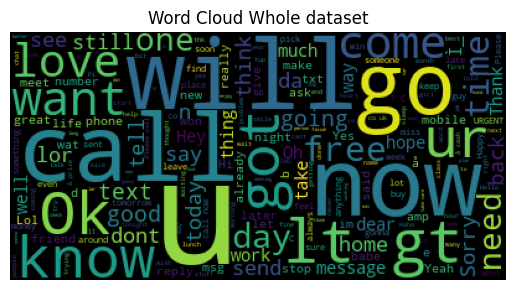

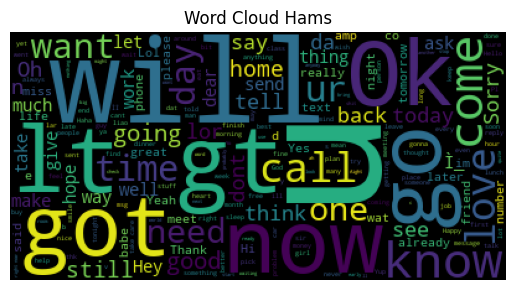

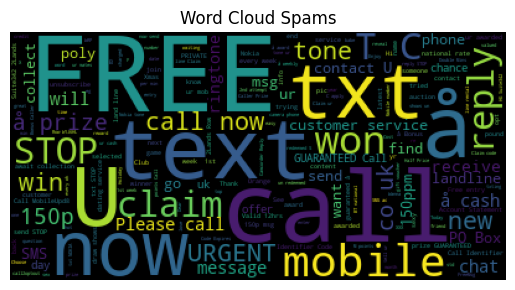

In [14]:
# wordclouds pour ham et spam
wd = wordcloud.WordCloud()
cloud = wd.generate(' '.join(data['text']))
wd = wordcloud.WordCloud()
cloud_ham = wd.generate(' '.join(data.loc[data["class"] == "ham","text"]))
wd = wordcloud.WordCloud()
cloud_spam = wd.generate(' '.join(data.loc[data["class"] == "spam","text"]))

plt.imshow(cloud)
plt.title('Word Cloud Whole dataset')
plt.axis("off")
plt.show()

plt.imshow(cloud_ham)
plt.title('Word Cloud Hams')
plt.axis("off")
plt.show()

plt.imshow(cloud_spam)
plt.title('Word Cloud Spams')
plt.axis("off")
plt.show()

In [15]:
# Vérification finale du dataset
print("Shape finale:", data.shape)
print("Types de données:")
print(data.dtypes)

Shape finale: (5543, 3)
Types de données:
class          object
text           object
text_length     int64
dtype: object


## Preprocessing

In [16]:
!python -m spacy download en_core_web_md #en_core_web_sm
import en_core_web_md
nlp = en_core_web_md.load()

ERROR: Invalid requirement: '#en_core_web_sm'

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS
data['text_clean'] = data['text'].apply(lambda x: ''.join(ch for ch in x if ch.isalnum() or ch==" "))
data['text_clean'] = data['text_clean'].apply(lambda x: x.replace('  ', ' ').lower().strip())
data['text_clean'] = data['text_clean'].apply(lambda x: " ".join([token.lemma_ for token in nlp(x) if (token.lemma_ not in STOP_WORDS) & (token.text not in STOP_WORDS)]))

data.head()

,class,text,text_length,text_clean
0,ham,"Go until jurong point, crazy.. Available only ...",111,jurong point crazy available bugis n great wor...
1,ham,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,49,u dun early hor u c
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah think usf live


In [ ]:
mask1 = data.text_clean.apply(lambda x: type(x)==str)
print('texts as str in data :\n', mask1.value_counts())

mask2 = data.text_clean.isna()==True
print('texts as NaN in data :\n', mask2.value_counts())

texts as str in data :
 text_clean
True    5543
Name: count, dtype: int64
texts as NaN in data :
 text_clean
False    5543
Name: count, dtype: int64


In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=1000)
tokenizer.fit_on_texts(data.text_clean)
data["text_encoded"] = tokenizer.texts_to_sequences(data.text_clean)

data["len_txt"] = data["text_encoded"].apply(lambda x: len(x))
data = data[data["len_txt"]!=0]

data.head()

,class,text,text_length,text_clean,text_encoded,len_txt
0,ham,"Go until jurong point, crazy.. Available only ...",111,jurong point crazy available bugis n great wor...,"[234, 445, 463, 941, 34, 51, 207, 942, 79, 943...",11
1,ham,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni,"[9, 195, 464, 289, 1]",5
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry 2 wkly comp win fa cup final tkts 2...,"[12, 298, 3, 534, 663, 31, 850, 423, 19, 164, ...",13
3,ham,U dun say so early hor... U c already then say...,49,u dun early hor u c,"[1, 125, 149, 1, 85]",5
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah think usf live,"[707, 22, 664, 130]",4


In [ ]:
data.shape



(5385, 6)

In [ ]:
print(len(tokenizer.index_word.keys()))

# Vocabulaire avec caractères spéciaux mais utiles pour détecter les spams

8287


In [ ]:
vocab_size = len(tokenizer.index_word.keys())
print(vocab_size)

8287


In [ ]:
texts_pad = tf.keras.preprocessing.sequence.pad_sequences(data.text_encoded, padding="post")
texts_pad.shape


(5385, 47)

In [ ]:
data['cat'] = data['class'].apply(lambda x: 1 if x == 'spam' else 0)
data.head()

<ipython-input-27-1981104026>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,class,text,text_length,text_clean,text_encoded,len_txt,cat
0,ham,"Go until jurong point, crazy.. Available only ...",111,jurong point crazy available bugis n great wor...,"[234, 445, 463, 941, 34, 51, 207, 942, 79, 943...",11,0
1,ham,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni,"[9, 195, 464, 289, 1]",5,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry 2 wkly comp win fa cup final tkts 2...,"[12, 298, 3, 534, 663, 31, 850, 423, 19, 164, ...",13,1
3,ham,U dun say so early hor... U c already then say...,49,u dun early hor u c,"[1, 125, 149, 1, 85]",5,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah think usf live,"[707, 22, 664, 130]",4,0


## Train/Validation/Test split

In [ ]:
X_temp, X_test, y_temp, y_test = train_test_split(texts_pad, data.cat, test_size=0.1, random_state=42, stratify=data.cat)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42, stratify=y_temp)

BATCH_SIZE = 32

train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val))
train_batch = train_ds.shuffle(len(train_ds)).batch(BATCH_SIZE)
val_batch = val_ds.batch(BATCH_SIZE)

In [ ]:
display(y_train.value_counts())
display(y_val.value_counts())
y_test.value_counts()

,count
cat,
0,3340
1,536


,count
cat,
0,836
1,134


,count
cat,
0,464
1,75


In [ ]:
# Vérification batch
for text_batch, label_batch in train_batch.take(1):
    print(label_batch, text_batch)

tf.Tensor([0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0], shape=(32,), dtype=int64) tf.Tensor(
[[103   1 518 ...   0   0   0]
 [ 66  60 881 ...   0   0   0]
 [873 155 799 ...   0   0   0]
 ...
 [184  49   4 ...   0   0   0]
 [  1 834   0 ...   0   0   0]
 [ 11   0   0 ...   0   0   0]], shape=(32, 47), dtype=int32)


In [ ]:
# Calcul des poids pour compenser le déséquilibre de classes
df_vc = data['cat'].value_counts()
display(df_vc)

d_cat = {}
for cat in df_vc.index:
    val = (1/df_vc[cat])*sum(df_vc.values)/2
    d_cat[cat] = val
print(d_cat)

,count
cat,
0,4640
1,745


{0: np.float64(0.5802801724137931), 1: np.float64(3.6140939597315436)}


In [ ]:
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=1000,
    decay_rate=0.96,
    staircase=True)
early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
)

In [ ]:
early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
)

# Modèle Baseline : Embedding simple

In [ ]:

len_texts = texts_pad.shape[1]

embedding_dim=128
vocab_size = 1000

model_baseline = Sequential([
  Embedding(vocab_size+1, embedding_dim, name="embedding"),
  GlobalAveragePooling1D(),
  Dense(len_texts, activation='relu'),
  Dense(80, activation='relu'),
  Dense(20, activation='relu'),
  Dense(2, activation="softmax")
])

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model_baseline.compile(
            optimizer=optimizer,
            loss=tf.keras.losses.SparseCategoricalCrossentropy(),
            metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
history = model_baseline.fit(
    train_batch,
    validation_data=val_batch,
    class_weight=d_cat,
    callbacks=[early_stopping],
    epochs=20)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning:

Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.



122/122 ━━━━━━━━━━━━━━━━━━━━ 16s 127ms/step - loss: 0.6740 - sparse_categorical_accuracy: 0.8645 - val_loss: 0.5022 - val_sparse_categorical_accuracy: 0.9577
Epoch 2/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - loss: 0.3366 - sparse_categorical_accuracy: 0.9089 - val_loss: 0.3929 - val_sparse_categorical_accuracy: 0.8330
Epoch 3/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 17s 56ms/step - loss: 0.1887 - sparse_categorical_accuracy: 0.9325 - val_loss: 0.0761 - val_sparse_categorical_accuracy: 0.9804
Epoch 4/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: 0.1280 - sparse_categorical_accuracy: 0.9724 - val_loss: 0.0799 - val_sparse_categorical_accuracy: 0.9804
Epoch 5/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 0.0977 - sparse_categorical_accuracy: 0.9799 - val_loss: 0.0973 - val_sparse_categorical_accuracy: 0.9701
Epoch 6/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.0765 - sparse_categorical_accuracy: 0.9812 - val_loss: 0.1034 - val_sparse_categorical_accuracy: 0.9753
Epoc

In [ ]:
model_baseline.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (32, 47, 128)          │       128,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (32, 128)              │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 47)               │         6,063 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 80)               │         3,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (32, 20)               │         1,620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (32, 2)                │            42 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 419,080 (1.60 MB)

 Trainable params: 139,693 (545.68 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 279,387 (1.07 MB)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


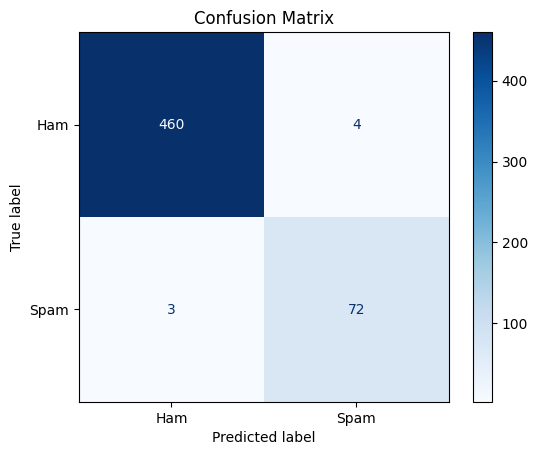

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       464
           1       0.95      0.96      0.95        75

    accuracy                           0.99       539
   macro avg       0.97      0.98      0.97       539
weighted avg       0.99      0.99      0.99       539



In [ ]:
# Evaluation du model
predictions = model_baseline.predict(X_test)
y_pred = np.argmax(predictions, axis=1)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Ham", "Spam"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred))

# Modèle Embedding avec techniques de régularisation
# Différentes approches testées :

# Technique DropOut (taux 20%) :
# version sans normalisation : early stopping epoch 9, temps 2min, f1 macro = 0.96
# version avec BatchNormalization sur 1ère couche : early stopping epoch 10, temps 2.5min, f1 macro = 0.97
# Techniques de pénalisation L1/L2 :
# régularisation L2 première couche + L1 autres couches : early stopping epoch 17, temps 5min, f1 macro = 0.96
# régularisation L1 première couche + L2 autres couches : training complet 20 epochs, temps 6min, f1 macro = 0.97
# Architecture finale sélectionnée : DropOut combiné à BatchNormalization

In [ ]:
len_texts = texts_pad.shape[1] #47

embedding_dim=128
vocab_size = 1000

model_EmbRegul = Sequential([
  Embedding(vocab_size+1, embedding_dim, name="embedding"),
  GlobalAveragePooling1D(),
  Dense(len_texts, activation='relu'),
  BatchNormalization(),
  Dropout(0.20),
  Dense(80, activation='relu'),
  Dropout(0.20),
  Dense(20, activation='relu'),
  Dense(2, activation="softmax")
])

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model_EmbRegul.compile(
            optimizer=optimizer,
            loss=tf.keras.losses.SparseCategoricalCrossentropy(),
            metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
history = model_EmbRegul.fit(
    train_batch,
    validation_data=val_batch,
    class_weight=d_cat,
    callbacks=[early_stopping],
    epochs=20)

Epoch 1/20
  1/122 ━━━━━━━━━━━━━━━━━━━━ 19s 165ms/step - loss: 0.7281 - sparse_categorical_accuracy: 0.1875

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning:

Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.



122/122 ━━━━━━━━━━━━━━━━━━━━ 9s 77ms/step - loss: 0.4861 - sparse_categorical_accuracy: 0.6667 - val_loss: 0.4228 - val_sparse_categorical_accuracy: 0.8619
Epoch 2/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 10s 76ms/step - loss: 0.0950 - sparse_categorical_accuracy: 0.9707 - val_loss: 0.3135 - val_sparse_categorical_accuracy: 0.8649
Epoch 3/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - loss: 0.0860 - sparse_categorical_accuracy: 0.9736 - val_loss: 0.1523 - val_sparse_categorical_accuracy: 0.9495
Epoch 4/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 10s 80ms/step - loss: 0.0581 - sparse_categorical_accuracy: 0.9771 - val_loss: 0.0999 - val_sparse_categorical_accuracy: 0.9701
Epoch 5/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - loss: 0.0443 - sparse_categorical_accuracy: 0.9900 - val_loss: 0.1627 - val_sparse_categorical_accuracy: 0.9629
Epoch 6/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - loss: 0.0675 - sparse_categorical_accuracy: 0.9722 - val_loss: 0.2469 - val_sparse_categorical_accuracy: 0.9103
Epoc

In [ ]:
fig = go.Figure(data=[
                      go.Scatter(
                          y=history.history["loss"],
                          name="Training loss",
                          mode="lines",
                          ),
                      go.Scatter(
                          y=history.history["val_loss"],
                          name="Validation loss",
                          mode="lines",
                          )
])
fig.update_layout(
    title='Embedding avec regulation : Training and val loss across epochs',
    xaxis_title='epochs',
    yaxis_title='Cross Entropy'
)
fig.show()

# Le graphique montre bien l'évolution :

Training loss (bleu) : descend progressivement et se stabilise
Validation loss (rouge) : descend jusqu'à l'epoch 4 puis remonte → signe d'overfitting

L'early stopping a bien fonctionné en arrêtant à l'epoch 5 (meilleur val_loss).

In [ ]:
fig = go.Figure(data=[
                      go.Scatter(
                          y=history.history["sparse_categorical_accuracy"],
                          name="Training accuracy",
                          mode="lines",
                          ),
                      go.Scatter(
                          y=history.history["val_sparse_categorical_accuracy"],
                          name="Validation accuracy",
                          mode="lines",
                          )
])
fig.update_layout(
    title='Embedding avec regulation : Training and val accuracy across epochs',
    xaxis_title='epochs',
    yaxis_title='Accuracy'
)
fig.show()

#  Le graphique d'accuracy montre :

Training accuracy (bleu) : monte progressivement vers 99%
Validation accuracy (rouge) : pic à l'epoch 4 (~98%) puis redescend

Cela confirme l'overfitting après l'epoch 4-5, justifiant l'early stoppin

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


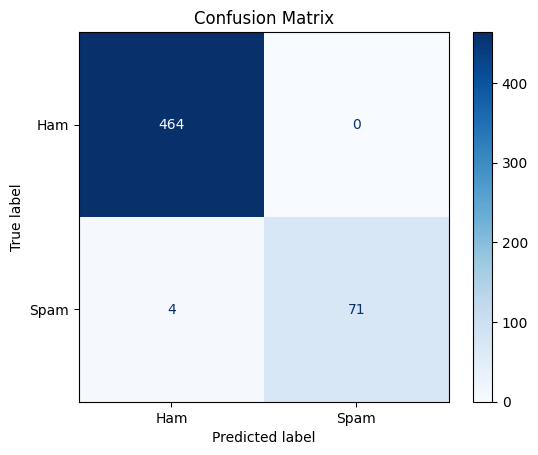

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       464
           1       1.00      0.95      0.97        75

    accuracy                           0.99       539
   macro avg       1.00      0.97      0.98       539
weighted avg       0.99      0.99      0.99       539



In [ ]:
# Evaluation du modèle
predictions = model_EmbRegul.predict(X_test)
y_pred = np.argmax(predictions, axis=1)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Ham", "Spam"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred))

In [ ]:
model_EmbRegul.save("Emb_3Dense_DropOut_BatchNorm.keras")

# Get the dictionary containing each metric and the loss for each epoch
history_dict = history.history
print(type(history_dict))
# Save it under the form of a json file
json.dump(history_dict, open("Emb_3Dense_DropOut_BatchNorm.json", 'w'))

<class 'dict'>


In [ ]:
embedding_dim=128
vocab_size = 1000

model_GRU = Sequential([
  Embedding(vocab_size+1, embedding_dim, name="embedding"),
  GRU(units=32, return_sequences=False),  # 32 au lieu de 64
  Dropout(0.30),  # 0.30 au lieu de 0.20
  Dense(2, activation="softmax")
])

In [ ]:
model_GRU.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model_GRU.compile(
            optimizer=optimizer,
            loss=tf.keras.losses.SparseCategoricalCrossentropy(),
            metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
history = model_GRU.fit(
    train_batch,
    validation_data=val_batch,
    class_weight=d_cat,
    callbacks=[early_stopping],
    epochs=20)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning:

Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.



122/122 ━━━━━━━━━━━━━━━━━━━━ 55s 452ms/step - loss: 0.6688 - sparse_categorical_accuracy: 0.7444 - val_loss: 0.7381 - val_sparse_categorical_accuracy: 0.1392
Epoch 2/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 56s 458ms/step - loss: 0.6825 - sparse_categorical_accuracy: 0.5377 - val_loss: 0.7036 - val_sparse_categorical_accuracy: 0.1392
Epoch 3/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 92s 537ms/step - loss: 0.6863 - sparse_categorical_accuracy: 0.4950 - val_loss: 0.7206 - val_sparse_categorical_accuracy: 0.1392
Epoch 4/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 72s 452ms/step - loss: 0.7002 - sparse_categorical_accuracy: 0.4220 - val_loss: 0.7178 - val_sparse_categorical_accuracy: 0.1392
Epoch 5/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 89s 515ms/step - loss: 0.6868 - sparse_categorical_accuracy: 0.5121 - val_loss: 0.7453 - val_sparse_categorical_accuracy: 0.1392
Epoch 6/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 76s 465ms/step - loss: 0.6944 - sparse_categorical_accuracy: 0.3989 - val_loss: 0.7141 - val_sparse_categorical_accuracy: 0.13

# Analyse :

GRU a du mal à converger (performances erratiques)
Beaucoup plus lent que les modèles Embedding
Performances instables : val_accuracy oscille entre 13% et 86%
Embedding simples > RNN

17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 185ms/step


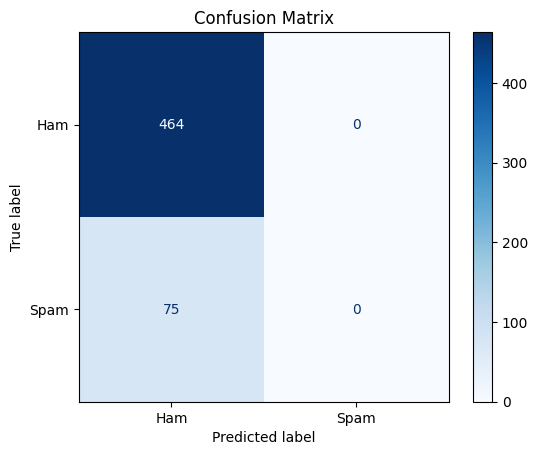

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       464
           1       0.00      0.00      0.00        75

    accuracy                           0.86       539
   macro avg       0.43      0.50      0.46       539
weighted avg       0.74      0.86      0.80       539



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
# Evaluation du modèle
predictions = model_GRU.predict(X_test)
y_pred = np.argmax(predictions, axis=1)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Ham", "Spam"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred))

## ccuracy : 86% (moins bon que les Embedding ~99%)
Problème majeur : Le modèle prédit TOUT en classe Ham !
464 Ham corrects, 0 erreurs
75 Spam tous classés comme Ham (0 Spam détectés)
F1 macro = 46% (très mauvais)
Le GRU a appris à dire "Ham" à tout, stratégie paresseuse car 86% des SMS sont Ham.

# RNN avec data augmentation

In [ ]:
dataspams = data.iloc[:,:]
print(dataspams.shape)
index_spam = dataspams[dataspams['class'] == "spam"].index
print(len(index_spam), index_spam)
for index in index_spam:
    for repetition in range(6): # chaque spam va apparaître 7 fois
        dataspams = pd.concat([dataspams, data.loc[[index]]], ignore_index=True)
print(dataspams.shape)
dataspams.tail()

(5385, 7)
745 Index([   2,    5,    8,    9,   11,   12,   15,   19,   34,   42,
       ...
       5464, 5469, 5473, 5496, 5498, 5509, 5512, 5519, 5537, 5538],
      dtype='int64', length=745)
(9855, 7)


,class,text,text_length,text_clean,text_encoded,len_txt,cat
9850,spam,This is the 2nd time we have tried 2 contact u...,161,2nd time try 2 contact u u win å750 pound priz...,"[266, 17, 47, 3, 92, 1, 1, 31, 279, 69, 3, 49,...",16,1
9851,spam,This is the 2nd time we have tried 2 contact u...,161,2nd time try 2 contact u u win å750 pound priz...,"[266, 17, 47, 3, 92, 1, 1, 31, 279, 69, 3, 49,...",16,1
9852,spam,This is the 2nd time we have tried 2 contact u...,161,2nd time try 2 contact u u win å750 pound priz...,"[266, 17, 47, 3, 92, 1, 1, 31, 279, 69, 3, 49,...",16,1
9853,spam,This is the 2nd time we have tried 2 contact u...,161,2nd time try 2 contact u u win å750 pound priz...,"[266, 17, 47, 3, 92, 1, 1, 31, 279, 69, 3, 49,...",16,1
9854,spam,This is the 2nd time we have tried 2 contact u...,161,2nd time try 2 contact u u win å750 pound priz...,"[266, 17, 47, 3, 92, 1, 1, 31, 279, 69, 3, 49,...",16,1


In [ ]:
texts_pad_spams = tf.keras.preprocessing.sequence.pad_sequences(dataspams.text_encoded, padding="post")
print(texts_pad_spams.shape)

BATCH_SIZE = 32

from sklearn.model_selection import train_test_split
X_temp, X_test_spams, y_temp, y_test_spams = train_test_split(texts_pad_spams, dataspams.cat, test_size=0.1, random_state=42, stratify=dataspams.cat)
X_train_spams, X_val_spams, y_train_spams, y_val_spams = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42, stratify=y_temp)
train_ds_spams = tf.data.Dataset.from_tensor_slices((X_train_spams, y_train_spams))
val_ds_spams = tf.data.Dataset.from_tensor_slices((X_val_spams, y_val_spams))
train_batch_spams = train_ds_spams.shuffle(len(train_ds_spams)).batch(BATCH_SIZE)
val_batch_spams = val_ds_spams.shuffle(len(val_ds_spams)).batch(BATCH_SIZE)

display(y_train_spams.value_counts())
display(y_val_spams.value_counts())
y_test_spams.value_counts()

(9855, 47)


,count
cat,
1,3754
0,3341


,count
cat,
1,939
0,835


,count
cat,
1,522
0,464


# GRU

In [ ]:
embedding_dim=128
vocab_size = 1000

model_GRU_dataaugm = Sequential([
  Embedding(vocab_size+1, embedding_dim, name="embedding"),
  GRU(units=64, return_sequences=False),
  Dropout(0.20),
  Dense(2, activation="softmax")
])

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model_GRU_dataaugm.compile(
            optimizer=optimizer,
            loss=tf.keras.losses.SparseCategoricalCrossentropy(),
            metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [ ]:
history = model_GRU_dataaugm.fit(
    train_batch_spams,
    validation_data=val_batch_spams,
    epochs=20)

Epoch 1/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 101s 454ms/step - loss: 0.6935 - sparse_categorical_accuracy: 0.5216 - val_loss: 0.6932 - val_sparse_categorical_accuracy: 0.5293
Epoch 2/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 99s 446ms/step - loss: 0.6940 - sparse_categorical_accuracy: 0.5215 - val_loss: 0.6923 - val_sparse_categorical_accuracy: 0.5293
Epoch 3/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 103s 462ms/step - loss: 0.6921 - sparse_categorical_accuracy: 0.5242 - val_loss: 0.6914 - val_sparse_categorical_accuracy: 0.5293
Epoch 4/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 101s 456ms/step - loss: 0.6921 - sparse_categorical_accuracy: 0.5324 - val_loss: 0.6914 - val_sparse_categorical_accuracy: 0.5299
Epoch 5/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 99s 446ms/step - loss: 0.6914 - sparse_categorical_accuracy: 0.5289 - val_loss: 0.6916 - val_sparse_categorical_accuracy: 0.5299
Epoch 6/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 99s 447ms/step - loss: 0.6918 - sparse_categorical_accuracy: 0.5307 - val_loss: 0.6939 - val_sparse_categorical_

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning:

Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.



31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 324ms/step


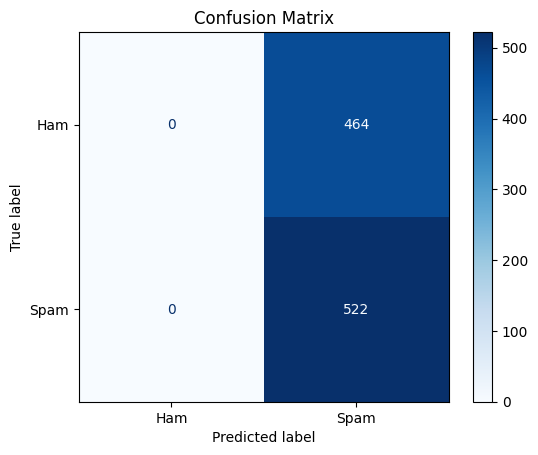

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       464
           1       0.53      1.00      0.69       522

    accuracy                           0.53       986
   macro avg       0.26      0.50      0.35       986
weighted avg       0.28      0.53      0.37       986



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
# Evaluation du modèle
predictions = model_GRU_dataaugm.predict(X_test_spams)
y_pred = np.argmax(predictions, axis=1)

cm = confusion_matrix(y_test_spams, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Ham", "Spam"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test_spams, y_pred))

In [ ]:
fig = go.Figure(data=[
                      go.Scatter(
                          y=history.history["loss"],
                          name="Training loss",
                          mode="lines",
                          ),
                      go.Scatter(
                          y=history.history["val_loss"],
                          name="Validation loss",
                          mode="lines",
                          )
])
fig.update_layout(
    title='GRU Training and val loss across epochs',
    xaxis_title='epochs',
    yaxis_title='Cross Entropy'
)
fig.show()

In [ ]:
fig = go.Figure(data=[
                      go.Scatter(
                          y=history.history["sparse_categorical_accuracy"],
                          name="Training accuracy",
                          mode="lines",
                          ),
                      go.Scatter(
                          y=history.history["val_sparse_categorical_accuracy"],
                          name="Validation accuracy",
                          mode="lines",
                          )
])
fig.update_layout(
    title='GRU Training and val accuracy across epochs',
    xaxis_title='epochs',
    yaxis_title='Accuracy'
)
fig.show()

In [ ]:
model_GRU_dataaugm.save("GRU1_DataAugmented.keras")

# Get the dictionary containing each metric and the loss for each epoch
history_dict = history.history
print(type(history_dict))
# Save it under the form of a json file
json.dump(history_dict, open("GRU1_DataAugmented.json", 'w'))

<class 'dict'>




### CONCLUSION

Le modèle Embedding Baseline offre les meilleures performances
pour la détection automatique de spam SMS chez AT&T.
